In [20]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load data from Google Sheets or CSV
url = "https://docs.google.com/spreadsheets/d/1GIbCJvwq3h6RyYvs8RlHGc87TSygv1Y03bapGVltlxw/export?format=csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

# Clean the data by filling NaN values
df.fillna(0, inplace=True)  # Replace NaN values with 0

# Convert the columns to appropriate data types if necessary
df['Year'] = df['Year'].astype(str)
df['Enrolling District Number'] = df['Enrolling District Number'].astype(int)
df['Enrolling District Type'] = df['Enrolling District Type'].astype(int)
df['Count of Open Enrolled'] = df['Count of Open Enrolled'].astype(int)
df['Resident District Number'] = df['Resident District Number'].astype(int)
df['Resident District Type'] = df['Resident District Type'].astype(int)

# Basic data exploration
# Grouping by Enrolling District and summing the counts
grouped_df = df.groupby(['Enrolling District']).agg({'Count of Open Enrolled': 'sum'}).reset_index()



# Grouping by Resident District and summing the counts
grouped_resident_df = df.groupby(['Resident District']).agg({'Count of Open Enrolled': 'sum'}).reset_index()






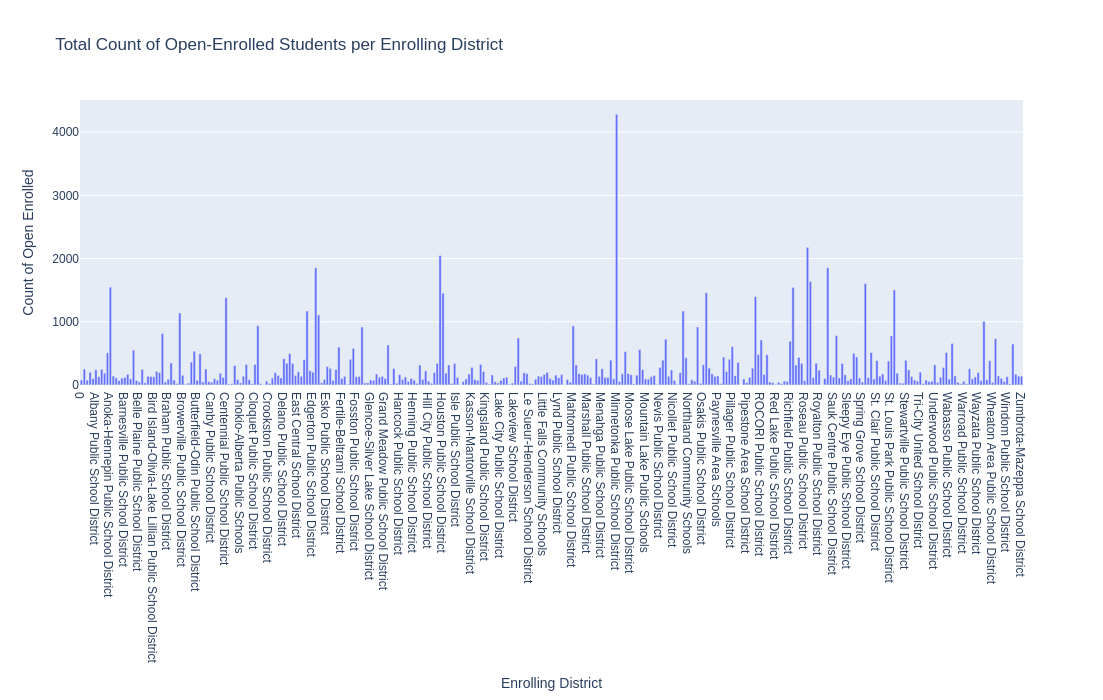

In [21]:
# Plotting the total count of open-enrolled students per enrolling district
fig1 = px.bar(grouped_df, x='Enrolling District', y='Count of Open Enrolled',
              title='Total Count of Open-Enrolled Students per Enrolling District',
              width=1200, height=700)
fig1.show()

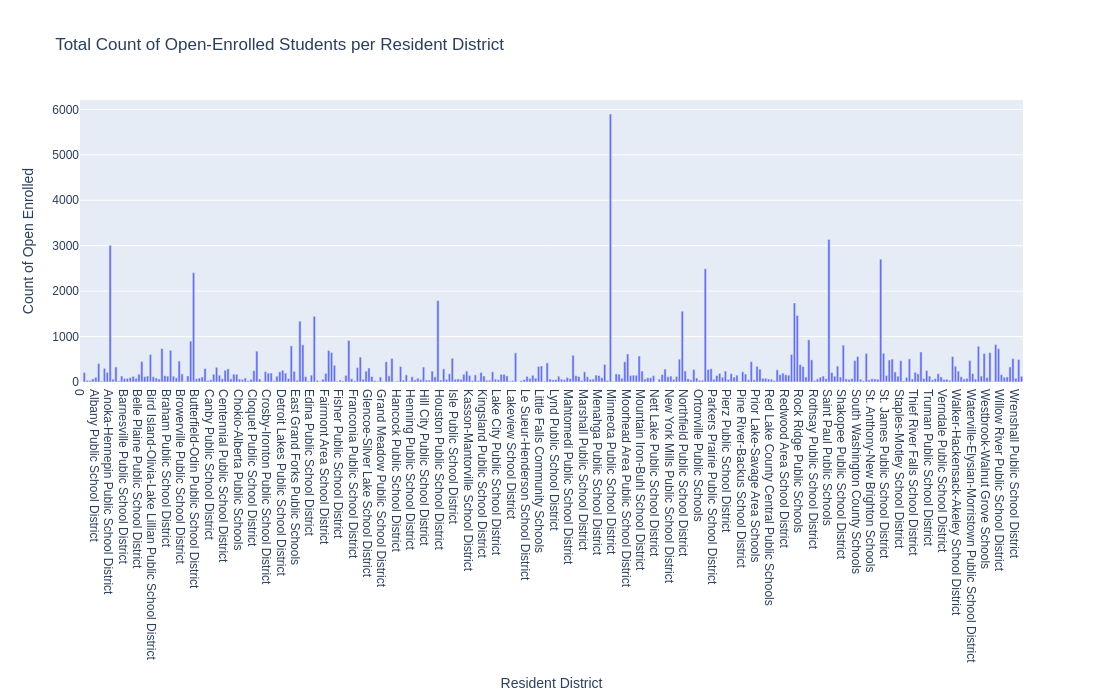

In [22]:
# Plotting the total count of open-enrolled students per resident district
fig2 = px.bar(grouped_resident_df, x='Resident District', y='Count of Open Enrolled',
              title='Total Count of Open-Enrolled Students per Resident District',
              width=1200, height=700)
fig2.show()


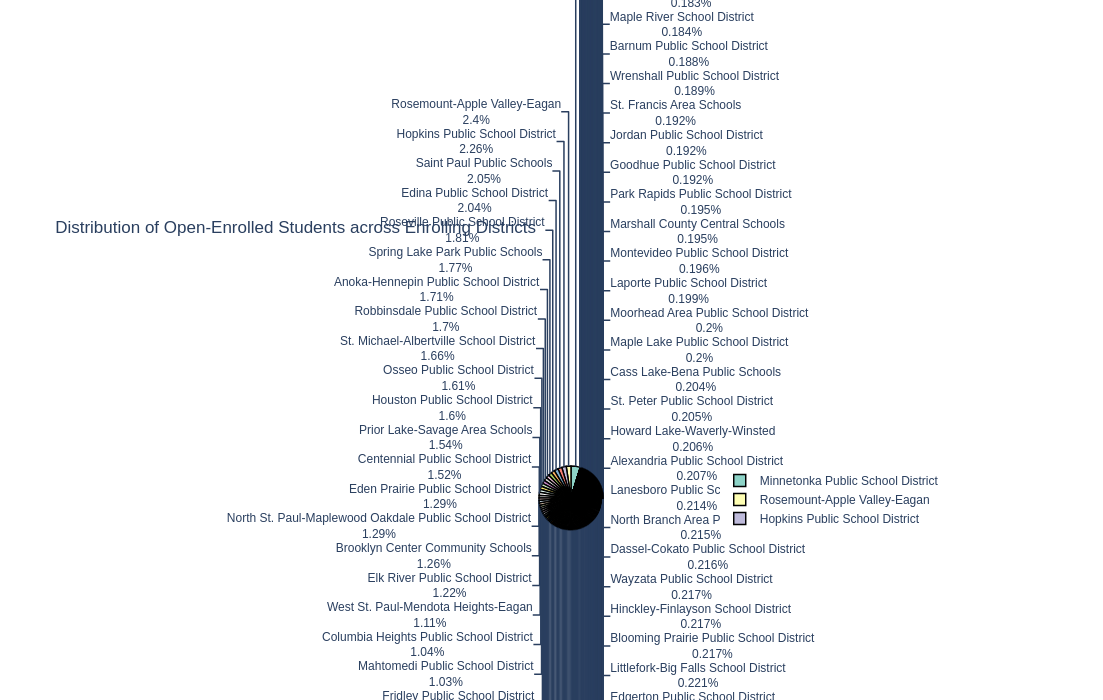

In [27]:
fig3 = px.pie(grouped_df, 
              names='Enrolling District', 
              values='Count of Open Enrolled',
              title='Distribution of Open-Enrolled Students across Enrolling Districts',
              color_discrete_sequence=px.colors.qualitative.Set3,  # Using a different color set
              width=1200, 
              height=700)

# Adding hover information and updating layout
fig3.update_traces(textinfo='percent+label', 
                   hoverinfo='label+percent+value', 
                   marker=dict(line=dict(color='#000000', width=1.5)))




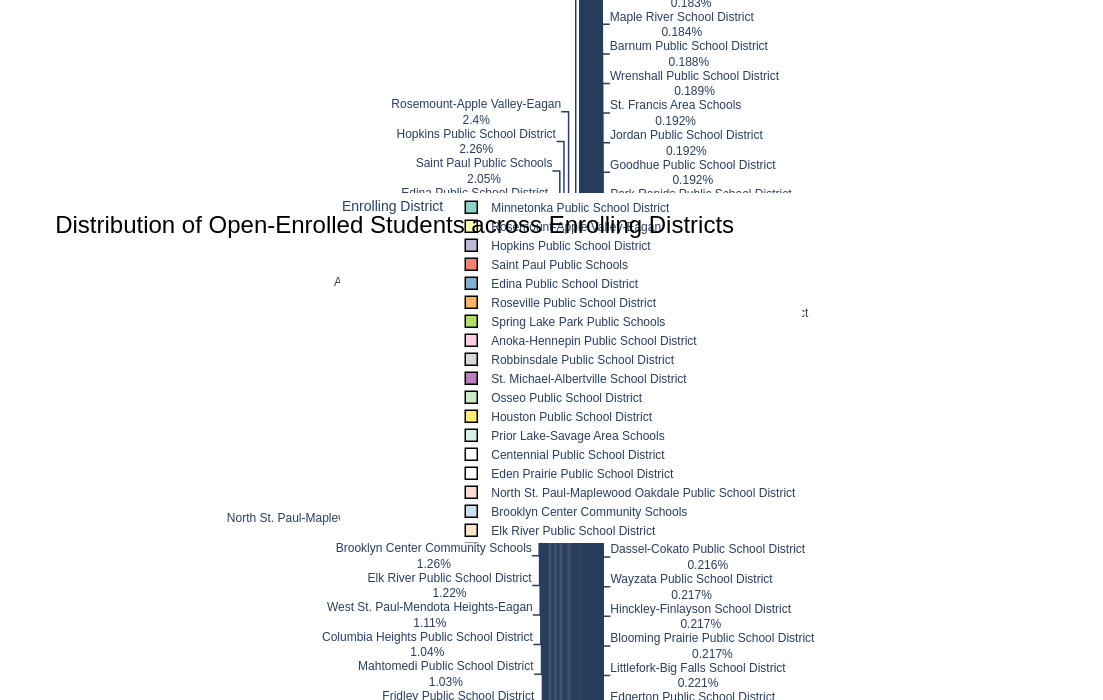

In [28]:
fig3.update_layout(
    title_font=dict(size=24, family='Arial', color='black'),
    legend_title_text='Enrolling District',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

fig3.show()

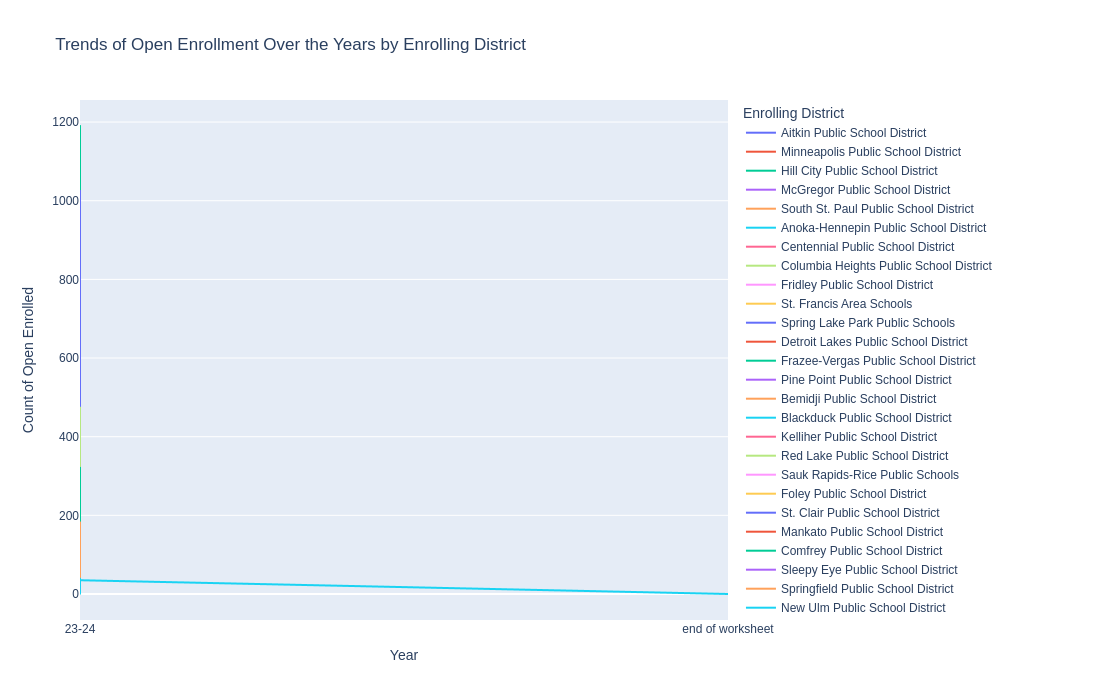

In [24]:

# Trends Over Years
fig4 = px.line(df, x='Year', y='Count of Open Enrolled', color='Enrolling District',
               title='Trends of Open Enrollment Over the Years by Enrolling District',
               width=1200, height=700)
fig4.show()


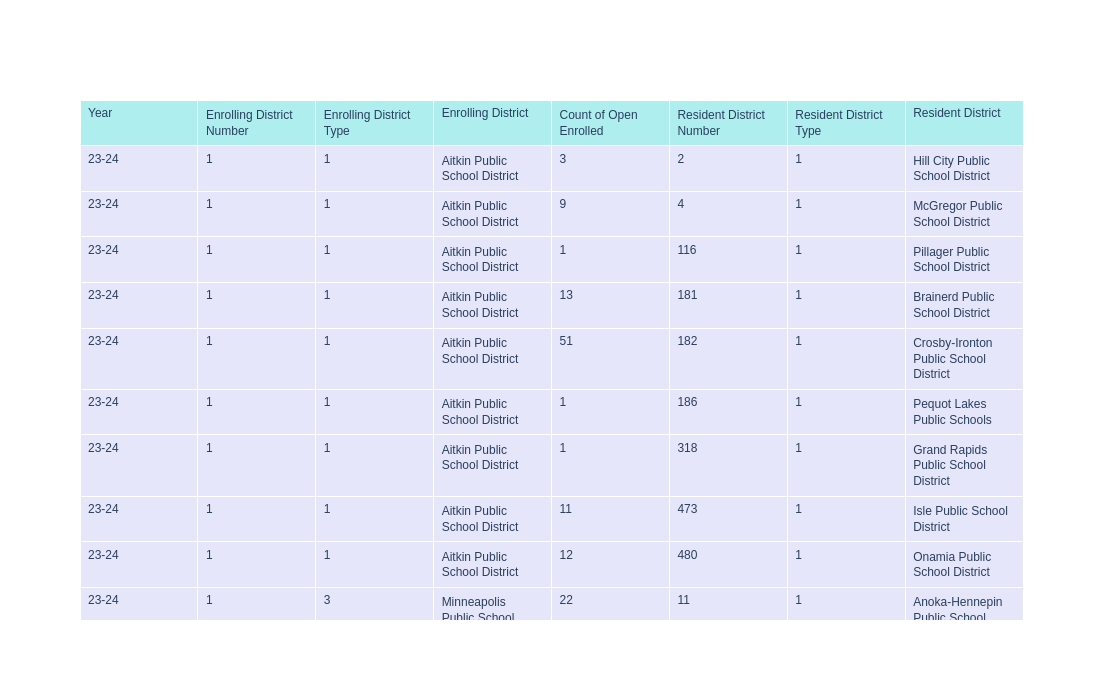

In [25]:
# Interactive Table with Plotly
fig5 = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color='lavender',
               align='left'))
])

fig5.update_layout(width=1200, height=700)
fig5.show()
